In [1]:
import pandas as pd
import pm4py

In [2]:
log = pm4py.read_xes('exportedPN.xes')

C:\Users\sssna\AppData\Local\Programs\Python\Python310\lib\site-packages\pm4py\util\dt_parsing\parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/600 [00:00<?, ?it/s]

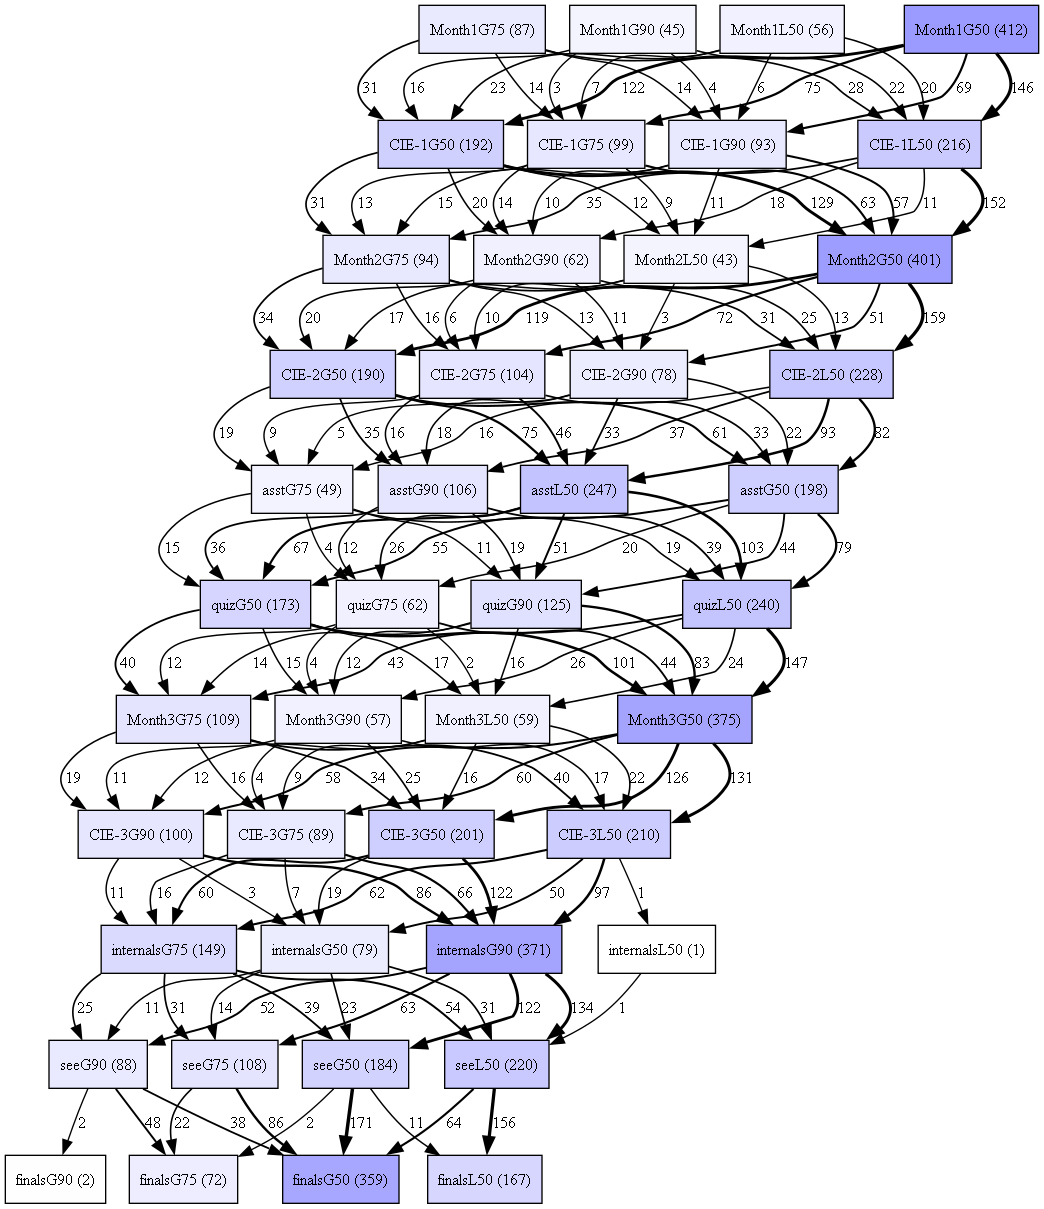

In [3]:
## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization
#Create graph from log
dfg = dfg_discovery.apply(log)
# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

In [4]:
dataframe = pd.read_csv('datatemplates.csv', sep=',')

In [5]:
dataframe

,USN,Date,Value,Vname,SV
0,1DS19CS001,11/21/2022 0:00,50,Month1G50,G50
1,1DS19CS001,11/23/2022 0:00,90,CIE-1G90,G90
2,1DS19CS001,12/7/2022 0:00,50,Month2G50,G50
3,1DS19CS001,12/9/2022 0:00,50,CIE-2G50,G50
4,1DS19CS001,12/13/2022 0:00,40,asstL50,L50
5,1DS19CS001,12/15/2022 0:00,50,quizG50,G50
6,1DS19CS001,12/23/2022 0:00,50,Month3G50,G50
7,1DS19CS001,12/25/2022 0:00,40,CIE-3L50,L50
8,1DS19CS001,12/27/2022 0:00,90,internalsG90,G90
9,1DS19CS001,1/7/2023 0:00,50,seeG50,G50


In [6]:
dataframe = pd.read_csv('datatemplate.csv')
dataframe['Date']= pd.to_datetime(dataframe['Date'])
dataframe = dataframe.rename(columns={'USN':'case:concept:name', 'Vname':'concept:name', 'Date':'time:timestamp', 'Value':'case:value', 'SV':'case:sv'})

In [8]:
net, im, fm = pm4py.discover_petri_net_inductive(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
fitness_alignments = pm4py.fitness_alignments(dataframe, net, im, fm, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

In [9]:
fitness_alignments

{'percFitTraces': 0.0,
 'averageFitness': 0.875,
 'percentage_of_fitting_traces': 0.0,
 'average_trace_fitness': 0.875,
 'log_fitness': 0.8749671887304227}

In [10]:
net, im, fm = pm4py.discover_petri_net_inductive(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(dataframe, net, im, fm, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

In [11]:
tbr_diagnostics

[{'trace_is_fit': False,
  'trace_fitness': 0.8590909090909091,
  'activated_transitions': [(26f3a946-91fe-4451-a35d-f31d18ef2364, 'Month1G50'),
   (974f2789-7e59-4284-b395-7213c8a27f1e, 'CIE-1G90'),
   (4a195241-34de-4069-b9c5-990610c96d6f, 'Month2G50'),
   (b26a7a40-5cb7-49dd-b43a-2be28089a764, 'CIE-2G50'),
   (3d8e9377-0849-4264-b1b8-3abc928c71fa, 'asstL50'),
   (b4a58897-7fab-4fc8-a7d7-77b66cb1d30d, 'quizG50'),
   (44c81d83-d24a-435f-b52c-d00aa455963a, 'Month3G50'),
   (tauSplit_1, None),
   (skip_3, None)],
  'reached_marking': ['p_11:1', 'p_12:1'],
  'enabled_transitions_in_marking': {(404df4ec-7f1a-4072-8b40-38e3312612d8, 'CIE-3L50'),
   (57530b43-f409-4d5b-a964-f29c030eb959, 'CIE-3G75'),
   (85a5235b-3146-476c-bb63-375dc4d24cbc, 'CIE-3G50'),
   (f2abc596-1ea0-465d-8314-e82f2ecdf29b, 'CIE-3G90')},
  'transitions_with_problems': [],
  'missing_tokens': 1,
  'consumed_tokens': 10,
  'remaining_tokens': 2,
  'produced_tokens': 11}]

In [12]:
net, im, fm = pm4py.discover_petri_net_inductive(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
alignments_diagnostics = pm4py.conformance_diagnostics_alignments(dataframe, net, im, fm, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

In [13]:
alignments_diagnostics

[{'alignment': [('Month1G50', 'Month1G50'),
   ('CIE-1G90', 'CIE-1G90'),
   ('Month2G50', 'Month2G50'),
   ('CIE-2G50', 'CIE-2G50'),
   ('asstL50', 'asstL50'),
   ('quizG50', 'quizG50'),
   ('Month3G50', 'Month3G50'),
   ('>>', None),
   ('>>', 'CIE-3L50'),
   ('>>', None),
   ('>>', None),
   ('>>', 'finalsG90'),
   ('>>', None),
   ('>>', None),
   ('>>', None)],
  'cost': 20006,
  'visited_states': 15,
  'queued_states': 71,
  'traversed_arcs': 71,
  'lp_solved': 9,
  'fitness': 0.875,
  'bwc': 160006}]